In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/covid_data_set/COVID.zip")
zip_ref.extractall("dataset")
zip_ref.close()

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
##reading all images
import cv2
import os
import numpy as np


dataset=[]
filenames=[]

def load_images_from_folder(folder):
    dim = (256,256)
    images = []
    filenames=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #img= img.astype(np.uint8)
        img= cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return filenames,images
  
filenames,dataset= load_images_from_folder('/content/dataset/COVID')

In [18]:
print(len(dataset))

2481


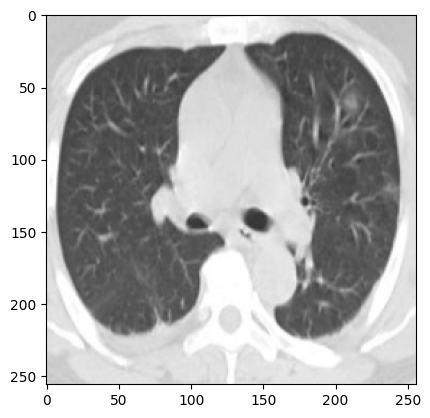

In [15]:

plt.imshow(dataset[200])

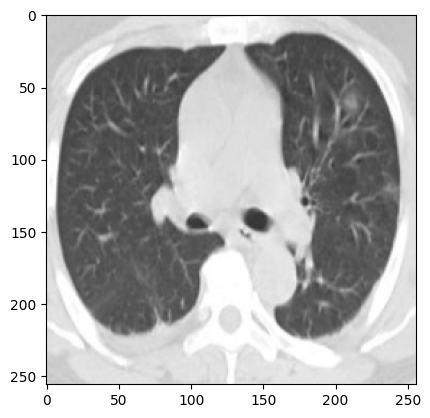

In [19]:
plt.imshow(dataset[200])

In [35]:
import numpy as np

training_data= np.asarray(dataset)

labels=[]


for i in range(len(filenames)):
  if "Non-" in filenames[i]:
      labels.append(int(0))
  else:
      labels.append(int(1))  

Y= np.asarray(labels)

In [36]:
print(Y[1500:2000])

[0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0
 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0
 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0
 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1
 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0
 1 1 1 0 0 1 0 0 1 0 0 1 

In [37]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X=training_data
Y=Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet101
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

171446536/171446536 [==============================] - 6s 0us/step


In [41]:
import tensorflow
X_train = tensorflow.keras.applications.resnet.preprocess_input(X_train)
X_test = tensorflow.keras.applications.resnet.preprocess_input(X_test)

In [42]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [43]:
avg = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(avg)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

In [44]:
for layer in base_model.layers:
    layer.trainable = False

In [45]:
epochs = 5
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [47]:
model.fit(x=X_train, y=y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32, callbacks=[earlyStopping])

Epoch 1/5
62/62 [==============================] - 39s 343ms/step - loss: 0.6518 - accuracy: 0.6809 - val_loss: 0.3157 - val_accuracy: 0.8592
Epoch 2/5
62/62 [==============================] - 15s 234ms/step - loss: 0.3829 - accuracy: 0.8266 - val_loss: 0.2947 - val_accuracy: 0.8773
Epoch 3/5
62/62 [==============================] - 17s 274ms/step - loss: 0.3197 - accuracy: 0.8579 - val_loss: 0.2455 - val_accuracy: 0.8954
Epoch 4/5
62/62 [==============================] - 17s 276ms/step - loss: 0.2726 - accuracy: 0.8846 - val_loss: 0.1818 - val_accuracy: 0.9316
Epoch 5/5
62/62 [==============================] - 15s 243ms/step - loss: 0.2249 - accuracy: 0.8967 - val_loss: 0.1754 - val_accuracy: 0.9235


In [48]:
for layer in base_model.layers:
    layer.trainable = True

In [49]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [50]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [52]:
model.fit(x=X_train, y=y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, callbacks=[earlyStopping], shuffle=True)

Epoch 1/50
62/62 [==============================] - 137s 777ms/step - loss: 0.2361 - accuracy: 0.9183 - val_loss: 0.6663 - val_accuracy: 0.8350
Epoch 2/50
62/62 [==============================] - 44s 706ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.3679 - val_accuracy: 0.9034
Epoch 3/50
62/62 [==============================] - 42s 671ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.1094 - val_accuracy: 0.9658
Epoch 4/50
62/62 [==============================] - 44s 703ms/step - loss: 0.0127 - accuracy: 0.9934 - val_loss: 0.5721 - val_accuracy: 0.8692
Epoch 5/50
62/62 [==============================] - 41s 667ms/step - loss: 0.0355 - accuracy: 0.9909 - val_loss: 0.3175 - val_accuracy: 0.9115
Epoch 6/50
62/62 [==============================] - 44s 708ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0740 - val_accuracy: 0.9759
Epoch 7/50
62/62 [==============================] - 42s 671ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0633 - val_accuracy: 0.979

In [53]:
model.evaluate(x=X_test, y=y_test)

16/16 [==============================] - 3s 192ms/step - loss: 0.0420 - accuracy: 0.9879


[0.042037203907966614, 0.9879275560379028]

In [55]:
model.save("AminRahmniCovid001.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##reading all images
import cv2
import os
import numpy as np


dataset=[]
filenames=[]

def load_images_from_folder(folder):
    dim = (256,256)
    images = []
    filenames=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #img= img.astype(np.uint8)
        img= cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return filenames,images

In [56]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd

from keras.utils.data_utils import get_file

#loading model


#آدرس مدل را نیز اینجا وارد کنید
model= load_model("/content/AminRahmniCovid001.h5",compile=True)

def load_images_from_folder(folder):
    dim = (256,256)
    images = []
    filenames=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #img= img.astype(np.uint8)
        img= cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
        img=np.reshape(img, (1, 256, 256, 3))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return filenames,images

## آدرس پوشه عکس ها را اینجا وارد کنید
filenames,images=load_images_from_folder("/content/test")
p_labels=[]

# این قسمت پریدیکت را انجام میدهد
for i in range (len(images)):
  predicted_label=model.predict(images[i],batch_size=None)
  
  if(predicted_label[0]>0.5):
    p_labels.append("Covid")
  else: 
    p_labels.append('NonCovid')  


Predicted_list = pd.DataFrame(
    {'Filnames':filenames ,
     'Predicted_Labels':p_labels ,
    })
Predicted_list.to_csv("Predicted_labels.csv")


1/1 [==============================] - 0s 45ms/step
